# Time Series From Scratch (part. 3) — White Noise and Random Walk (Dario Radečić)
[Source](https://towardsdatascience.com/time-series-from-scratch-white-noise-and-random-walk-5c96270514d3). From [Time Series From Scratch](https://towardsdatascience.com/tagged/time-series-from-scratch).

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
%load_ext watermark

In [6]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

In [3]:
# from tqdm import tqdm

# from glob import glob

# import matplotlib.pyplot as plt
# %matplotlib inline
# from IPython.core.pylabtools import figsize
# figsize(12, 8)

# import seaborn as sns
# sns.set_theme()

# pd.set_option("max_columns", None)
# pd.set_option("max_rows", None)
# pd.set_option('display.max_colwidth', None)

# from IPython.display import Markdown, display
# def md(arg):
#     display(Markdown(arg))

# from pandas_profiling import ProfileReport
# #report = ProfileReport(#DataFrame here#, minimal=True)
# #report.to

# import pyarrow.parquet as pq
# #df = pq.ParquetDataset(path_to_folder_with_parquets, filesystem=None).read_pandas().to_pandas()

# import json
# def open_file_json(path,mode='r',var=None):
#     if mode == 'w':
#         with open(path,'w') as f:
#             json.dump(var, f)
#     if mode == 'r':
#         with open(path,'r') as f:
#             return json.load(f)

# import functools
# import operator
# def flat(a):
#     return functools.reduce(operator.iconcat, a, [])

# import json
# from glob import glob
# from typing import NewType


# DictsPathType = NewType("DictsPath", str)


# def open_file_json(path):
#     with open(path, "r") as f:
#         return json.load(f)

# class LoadDicts:
#     def __init__(self, dict_path: DictsPathType = "./data"):
#         Dicts_glob = glob(f"{dict_path}/*.json")
#         self.List = []
#         self.Dict = {}
#         for path_json in Dicts_glob:
#             name = path_json.split("/")[-1].replace(".json", "")
#             self.List.append(name)
#             self.Dict[name] = open_file_json(path_json)
#             setattr(self, name, self.Dict[name])


In [4]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v
!cat /proc/cpuinfo |grep 'model name'|head -n 1 |sed -e 's/model\ name/CPU/'
!free -h |cut -d'i' -f1  |grep -v total

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 7.25.0

Compiler    : GCC 8.3.0
OS          : Linux
Release     : 5.11.0-7620-generic
Machine     : x86_64
Processor   : 
CPU cores   : 4
Architecture: 64bit

Git hash: 82988b3bb96bdaf504a194b9a7bd3521ee97184e

Git repo: https://github.com/ysraell/forecasting.git

Git branch: main

matplotlib: 3.4.2
pandas    : 1.3.1
numpy     : 1.19.5

CPU	: Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz
Mem:           15G
Swap:         4.0G


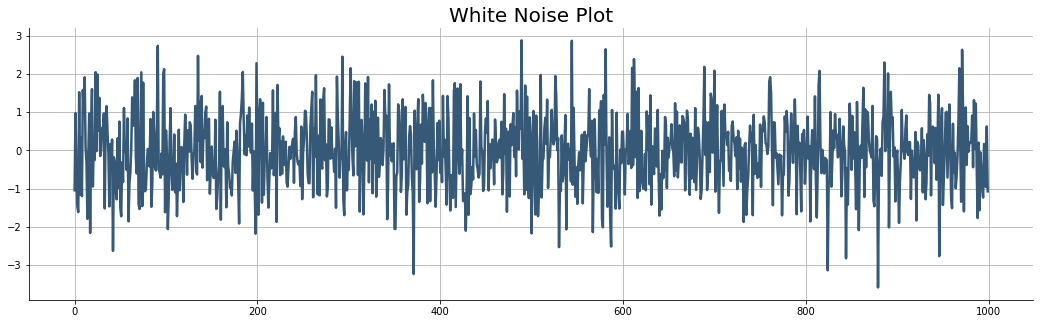

In [5]:
# Declare
white_noise = np.random.randn(1000)

# Plot
plt.title('White Noise Plot', size=20)
plt.plot(np.arange(len(white_noise)), white_noise);
plt.grid()

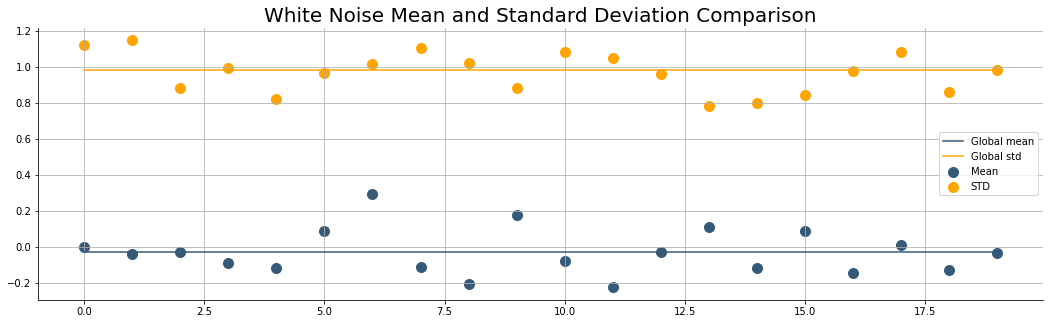

In [8]:
# Split into an arbitraty number of chunks
white_noise_chunks = np.split(white_noise, 20)
means, stds = [], []

# Get the mean and std values for every chunk
for chunk in white_noise_chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))
    
    
# Plot
plt.title('White Noise Mean and Standard Deviation Comparison', size=20)
plt.plot(np.arange(len(means)), [white_noise.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [white_noise.std()] * len(stds), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
plt.legend();
plt.grid()

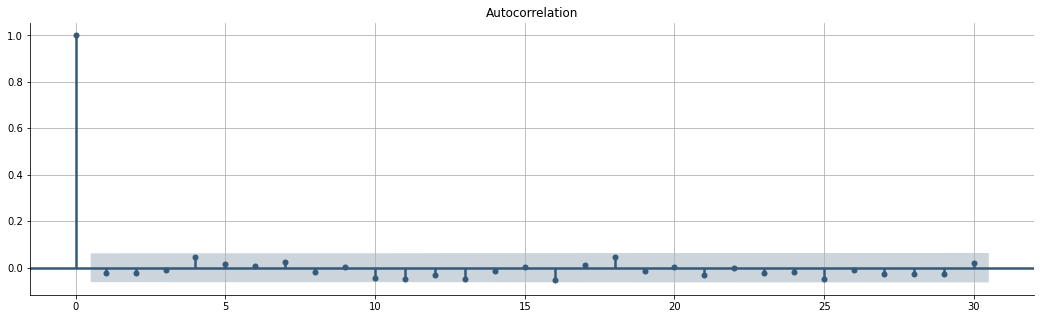

In [10]:
plot_acf(np.array(white_noise))
plt.grid()

0.9665354330708661

1.0100603621730382


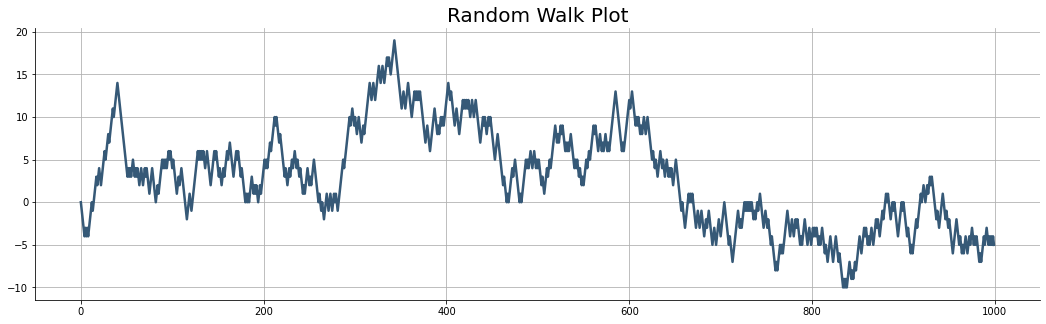

In [40]:
random_walk_diff = (np.random.random(1000) < 0.5)*2 -1
random_walk_diff[0] = 0
random_walk = np.cumsum(random_walk_diff)
print(sum(random_walk_diff<0) / sum(random_walk_diff>0))
# Plot
plt.title('Random Walk Plot', size=20)
plt.plot(np.arange(len(random_walk)), random_walk)
plt.grid()

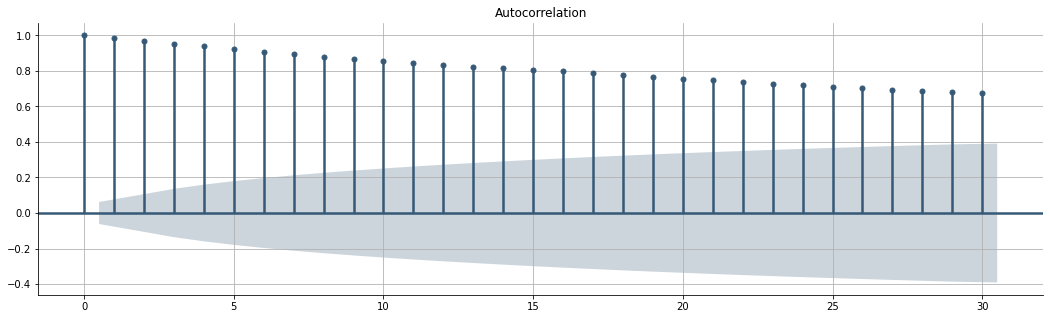

In [41]:
plot_acf(np.array(random_walk));
plt.grid()

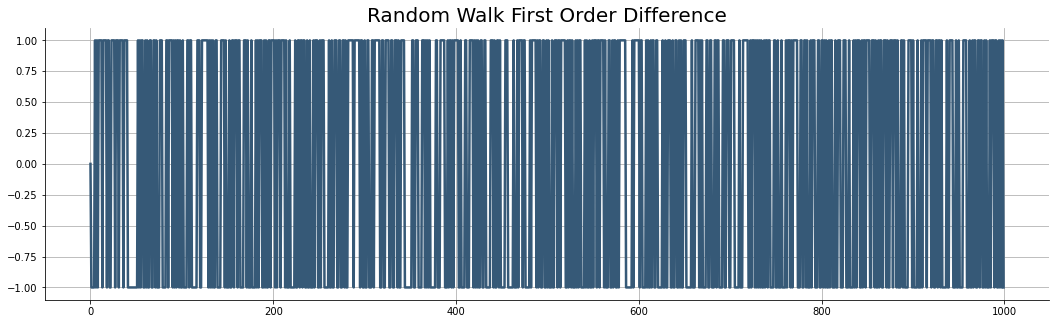

In [42]:
# Plot
plt.title('Random Walk First Order Difference', size=20)
plt.plot(random_walk_diff)
plt.grid()

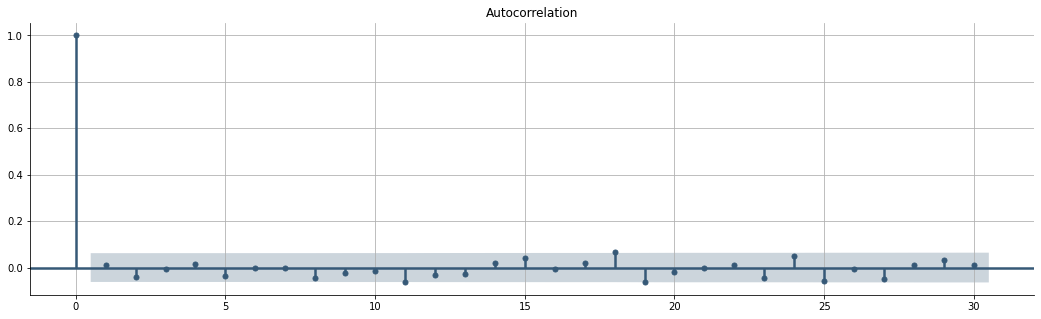

In [45]:
plot_acf(random_walk_diff)
plt.grid()